In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [259]:
df = pd.read_csv("tips (data for regression problem).csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [260]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [261]:
# Scaling the Column "total_bill" :

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_dummies["total_bill"] =scaler.fit_transform(df_dummies[["total_bill"]])

# Regression Models

In [262]:
X_reg = df_dummies.drop(columns=["tip"])
y_reg = df_dummies["tip"]

#Split training and testing datasets, Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg,test_size= 0.2, random_state=42)

### 1. Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

#Predictions 
y_pred_linear_reg = linear_regression.predict(X_test)

#Evaluate metrics
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test,y_pred_linear_reg)
print(f"R2 score for Linear Regression is {r2_linear_reg}")
print(f"MSE for Linear Regression is {mse_linear_reg}")

R2 score for Linear Regression is 0.43730181943482527
MSE for Linear Regression is 0.7033566017436101


### 2. Ridge Regression

In [264]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=10.0)
ridge_regression.fit(X_train,y_train)

#Predictions 
y_pred_ridge_reg = ridge_regression.predict(X_test)

#Evaluate metrics
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)
mse_ridge_reg = mean_squared_error(y_test,y_pred_ridge_reg)
print(f"R2 score for Ridge Regression is {r2_ridge_reg}")
print(f"MSE for Ridge Regression is {mse_ridge_reg}")

R2 score for Ridge Regression is 0.2929005070300409
MSE for Ridge Regression is 0.8838541044693768


### 3. Lasso Regression

In [265]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.25)
lasso_regression.fit(X_train,y_train)

#Predictions 
y_pred_lasso_reg= lasso_regression.predict(X_test)

#Evaluate metrics
r2_lasso_reg = r2_score(y_test, y_pred_lasso_reg)
mse_lasso_reg = mean_squared_error(y_test,y_pred_lasso_reg)
print(f"R2 score for Lasso regression is {r2_lasso_reg}")
print(f"MSE for Lasso regression is {mse_lasso_reg}")

R2 score for Lasso regression is 0.10700975777748045
MSE for Lasso regression is 1.116212214386369


### 4. Decision Tree Regression

In [266]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train,y_train)

#Predictions 
y_pred_tree = tree.predict(X_test)

#Evaluate metrics
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test,y_pred_tree)
print(f"R2 score for Decision tree regressor is {r2_tree}")
print(f"MSE for Decision tree regressor is {mse_tree}")

R2 score for Decision tree regressor is -0.004178121600921791
MSE for Decision tree regressor is 1.2551938775510205


### 5. Random Forest

In [267]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train,y_train)

#Predictions
y_pred_forest = forest.predict(X_test)

#Evaluate metrics  
r2_forest = r2_score(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test,y_pred_forest)
print(f"R2 score for Random forest regressor is {r2_forest}")
print(f"MSE for Random forest regressor is {mse_forest}")

R2 score for Random forest regressor is 0.2642525187016357
MSE for Random forest regressor is 0.9196632689795929


### 6. Support Vector Regression

In [268]:
from sklearn.svm import SVR
svr = SVR(kernel = "linear")
svr.fit(X_train,y_train)

#Predictions    
y_pred_svr = svr.predict(X_test)

#Evaluate metrics
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test,y_pred_svr)
print(f"R2 score for Support vector regressor is {r2_svr}")
print(f"MSE for Support vector regressor is {mse_svr}")

R2 score for Support vector regressor is 0.43025919700140525
MSE for Support vector regressor is 0.7121596779809606


### 7. K-Nearest Neighbours

In [269]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

#Predictions
y_pred_knn = knn.predict(X_test)

#Evaluate metrics
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
print(f"R2 score for KNN regressor is {r2_knn}")
print(f"MSE for KNN regressor is {mse_knn}")

R2 score for KNN regressor is 0.07950229462986103
MSE for KNN regressor is 1.150595755102041


Comparing accuracy of all above models, best performance was of Linaer Regression Model. <br>
It had the highest R2 score.

### Most Important Feature

In [270]:
# Which factors most significantly impacted tip amounts?
features_coeff_abs = (pd.Series(linear_regression.coef_, index = X_reg.columns)).abs().sort_values(ascending = False)

print(f"Following are the magnitudes of the coefficients of each feature in the trained Linear Regression Model. \nHigher the magnitude, higher the impact on tip amount. \n\n{features_coeff_abs}")


Following are the magnitudes of the coefficients of each feature in the trained Linear Regression Model. 
Higher the magnitude, higher the impact on tip amount. 

total_bill    4.520965
size          0.233484
smoker_Yes    0.192353
day_Sat       0.185785
day_Thur      0.179721
time_Lunch    0.094957
day_Sun       0.050793
sex_Male      0.028819
dtype: float64


Hence, total_bill is the feature with most impact 

# Plots

### 1. Scatterplots and Lineplots

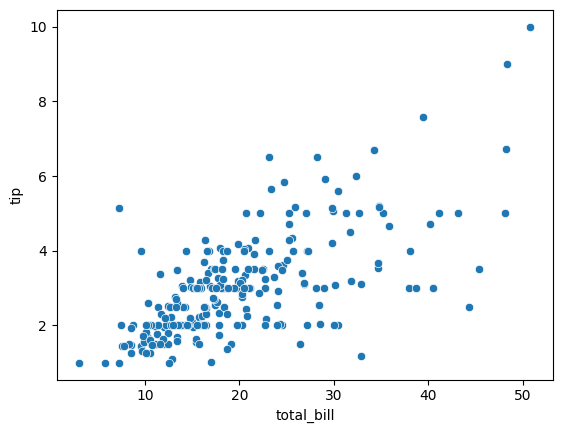

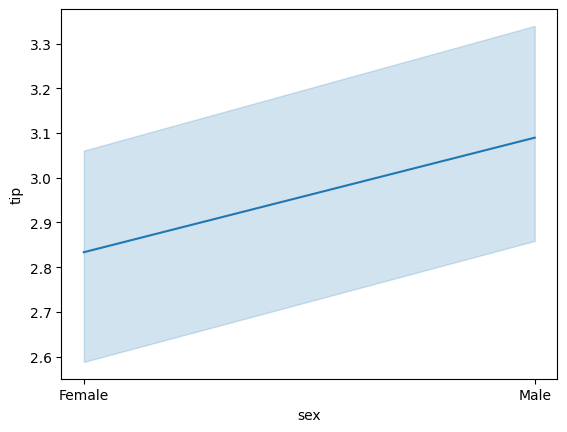

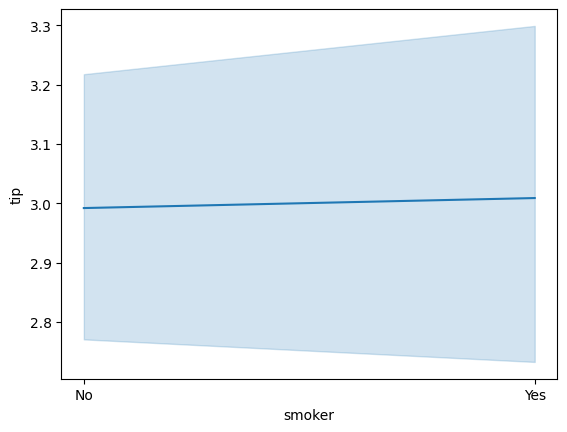

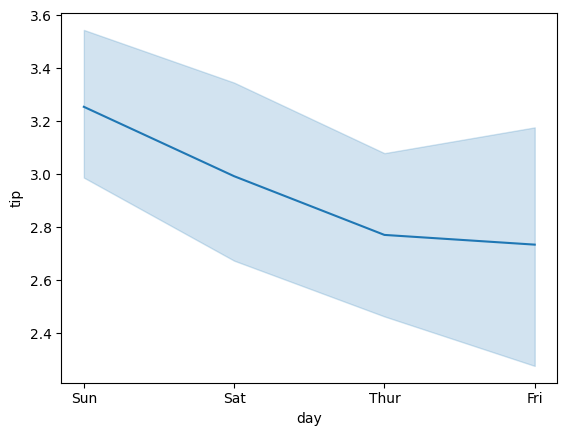

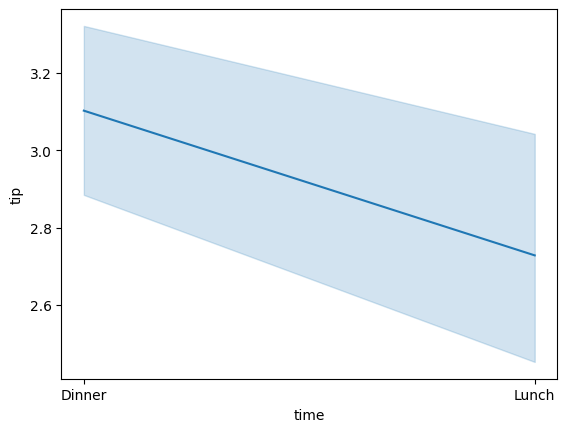

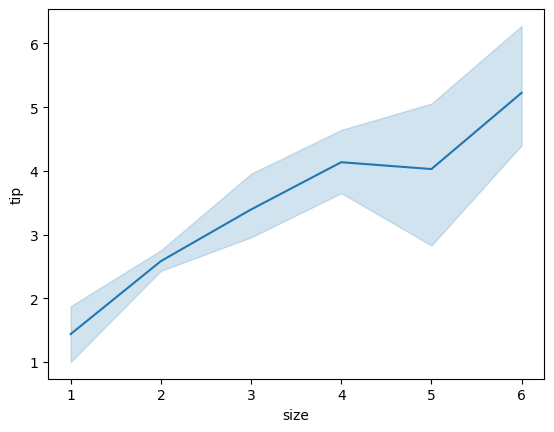

In [271]:
# As only numeric feature is total_bill, we will use it for Scatter Plot and Line Plot
# Rest features will be depicted with line plots, each point is mean of the value of "tip" for that particular class.

sns.scatterplot(x = 'total_bill', y = 'tip', data = df)
plt.show()

for i in df.columns : 
    if i != 'total_bill' and i != 'tip':
        sns.lineplot(x=i,y="tip",data=df,estimator="mean")
        plt.show()

### 2. Pairplot

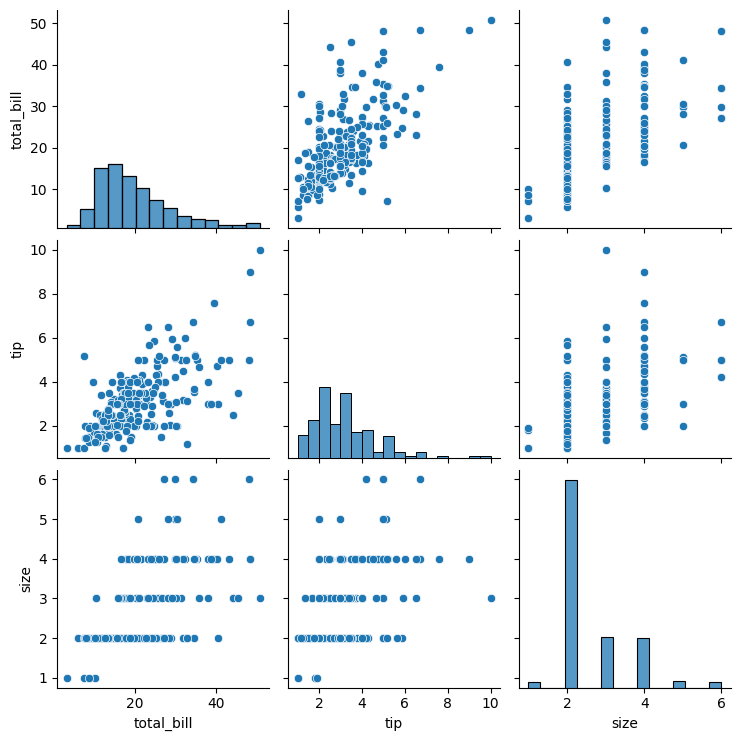

In [272]:
sns.pairplot(df)
plt.show()

### 3. Correlation Matrix with Heatmap

<Axes: >

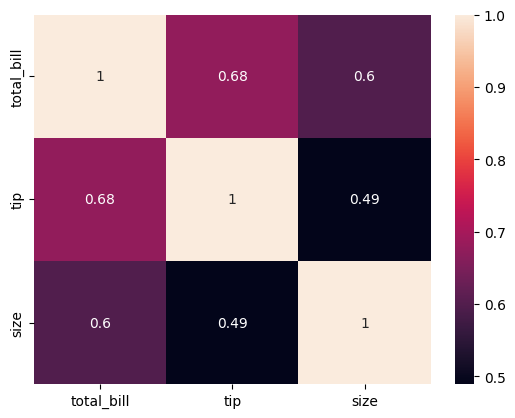

In [273]:
df_correlation = df[["total_bill","tip","size"]].corr()
sns.heatmap(df_correlation, annot=True)

### 3. Plotting Residuals

Here we will plot the error (= y_pred - y_test) for each value of y_test.

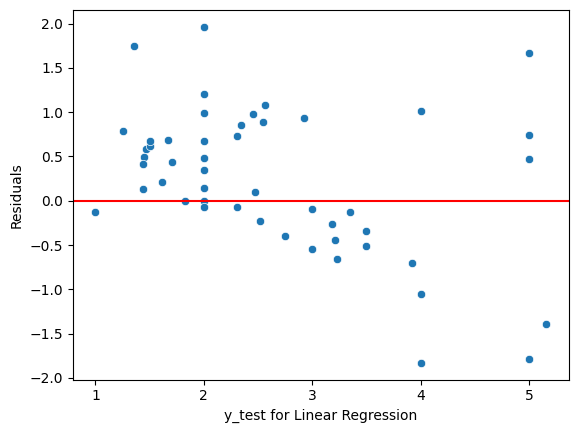

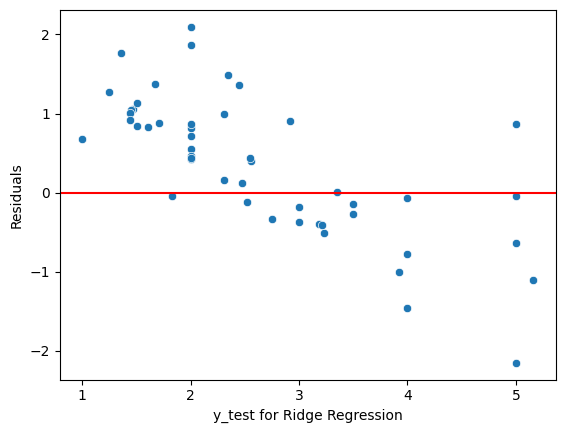

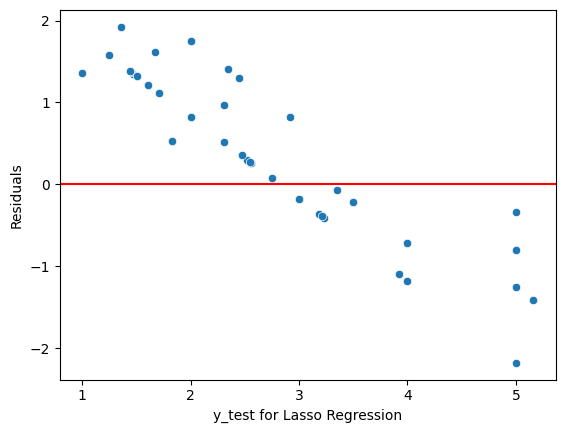

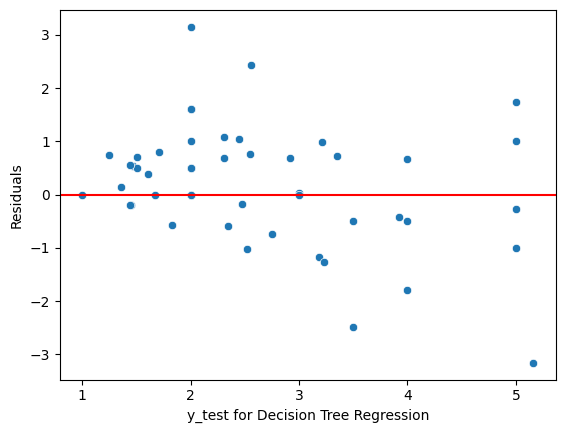

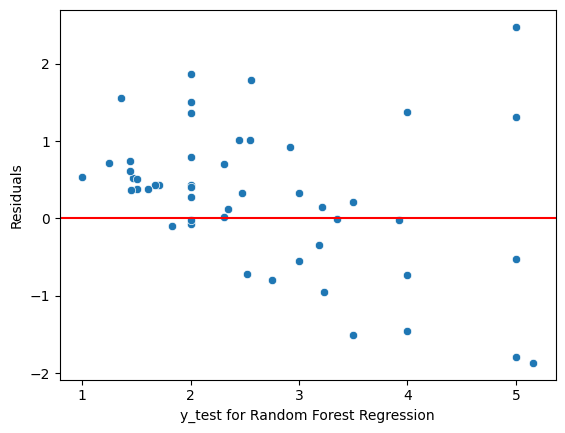

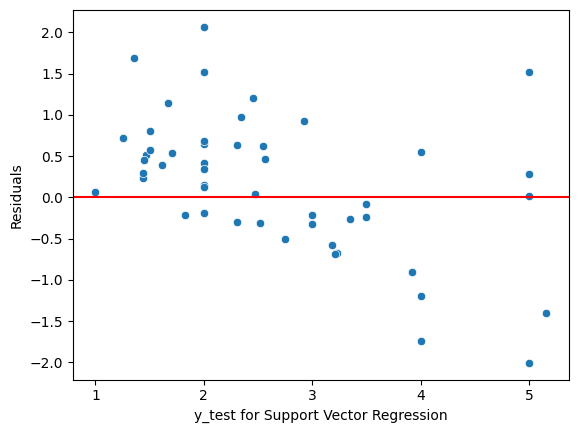

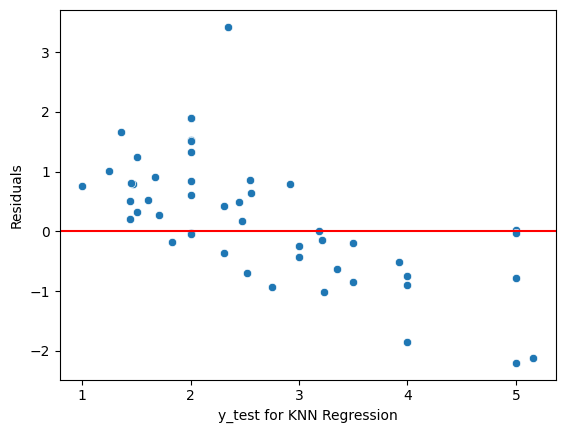

In [274]:
def residuals_plotting(y_test, y_pred,label):
    residuals = y_pred - y_test
    sns.scatterplot(x = y_test, y = residuals)
    plt.xlabel(f"y_test for {label}")
    plt.ylabel("Residuals")
    plt.axhline(y = 0, color = 'r')
    plt.show()

residuals_plotting(y_test,y_pred_linear_reg,"Linear Regression") 
residuals_plotting(y_test,y_pred_ridge_reg,"Ridge Regression")
residuals_plotting(y_test,y_pred_lasso_reg,"Lasso Regression")
residuals_plotting(y_test,y_pred_tree,"Decision Tree Regression")
residuals_plotting(y_test,y_pred_forest,"Random Forest Regression")
residuals_plotting(y_test,y_pred_svr,"Support Vector Regression")
residuals_plotting(y_test,y_pred_knn,"KNN Regression")


## Rainbow Test

The Rainbow Test is a statistical test used to detect specification errors in a regression model, specifically misspecification of functional form or non-constant variance (heteroscedasticity) in the error terms

It uses an F-statistic to measure the variance difference. This statistic compares the variances of residuals from the middle subset and the entire dataset.

If the p value if >=threshold (say 0.05), then Null hypothesis is accepted i.e model correctly classified as linear.

In [275]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])
df_encoded['day'] = label_encoder.fit_transform(df['day'])
df_encoded['time'] = label_encoder.fit_transform(df['time'])

In [276]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

#We will have to train a Linear Regression model using statsmodels.OLS , as it is not directly compatible with sckikit learn

X = df_encoded.drop(columns = ['tip'])
y = df_encoded['tip']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2192606967586408
P-value: 0.141104958053905


As p-value is > 0.05; hence regression is correctly modelled as linear.

## Conclusion

1. Restaurant should focus more on Sunday meals as more tips are received on that day
2. Restaurant should focus more on dinner as more tips are receives in dinner.
3. Bigger size groups of people should be given more priority as they give more tips also.